In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Clustering batting data of ODI


In [2]:
odi_batting=pd.read_csv("D:\Studies\Bangalore\Python\datasets for project\Cleaned dataset\odi_batting_cleaned.csv")
odi_fdata=odi_batting[odi_batting['Inns']>30]
features=['HS','Runs','Ave','SR','100','50','0']
data=odi_fdata[features]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 1577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HS      637 non-null    int64  
 1   Runs    637 non-null    float64
 2   Ave     637 non-null    float64
 3   SR      637 non-null    float64
 4   100     637 non-null    float64
 5   50      637 non-null    float64
 6   0       637 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.8 KB


In [4]:
odi_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mat        2500 non-null   int64  
 1   Inns       2500 non-null   float64
 2   NO         2500 non-null   float64
 3   Runs       2500 non-null   float64
 4   HS         2500 non-null   int64  
 5   Ave        2500 non-null   float64
 6   BF         2500 non-null   float64
 7   SR         2500 non-null   float64
 8   100        2500 non-null   float64
 9   50         2500 non-null   float64
 10  0          2500 non-null   float64
 11  Startyear  2500 non-null   int64  
 12  Endyear    2500 non-null   int64  
 13  HSNotOut   2500 non-null   bool   
 14  Name       2500 non-null   object 
 15  Country    2500 non-null   object 
dtypes: bool(1), float64(9), int64(4), object(2)
memory usage: 295.5+ KB


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

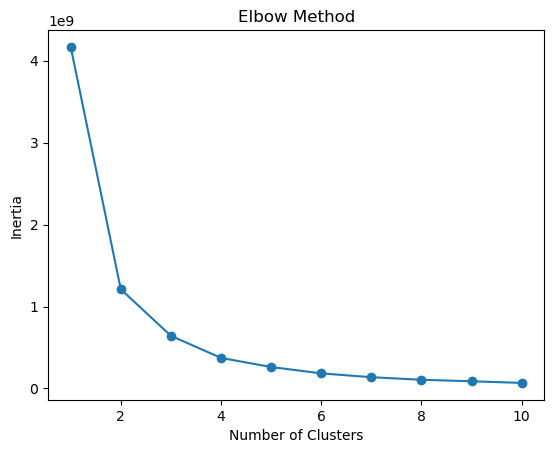

In [18]:
# Determine optimal clusters using the Elbow method
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [70]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)
data['Cluster'] = clusters

In [20]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['HS', 'Runs', 'Ave', 'SR', '100', '50', '0'])
print(cluster_centers)


           HS         Runs        Ave         SR        100         50  \
0   81.755230  1114.426778  22.451925  73.771757   0.748954   5.240586   
1  132.148760  4682.173554  35.391570  77.500661   5.743802  27.760331   
2  162.473684  9849.973684  40.212632  82.258947  17.526316  58.763158   

           0  
0   5.548117  
1   9.958678  
2  15.684211  


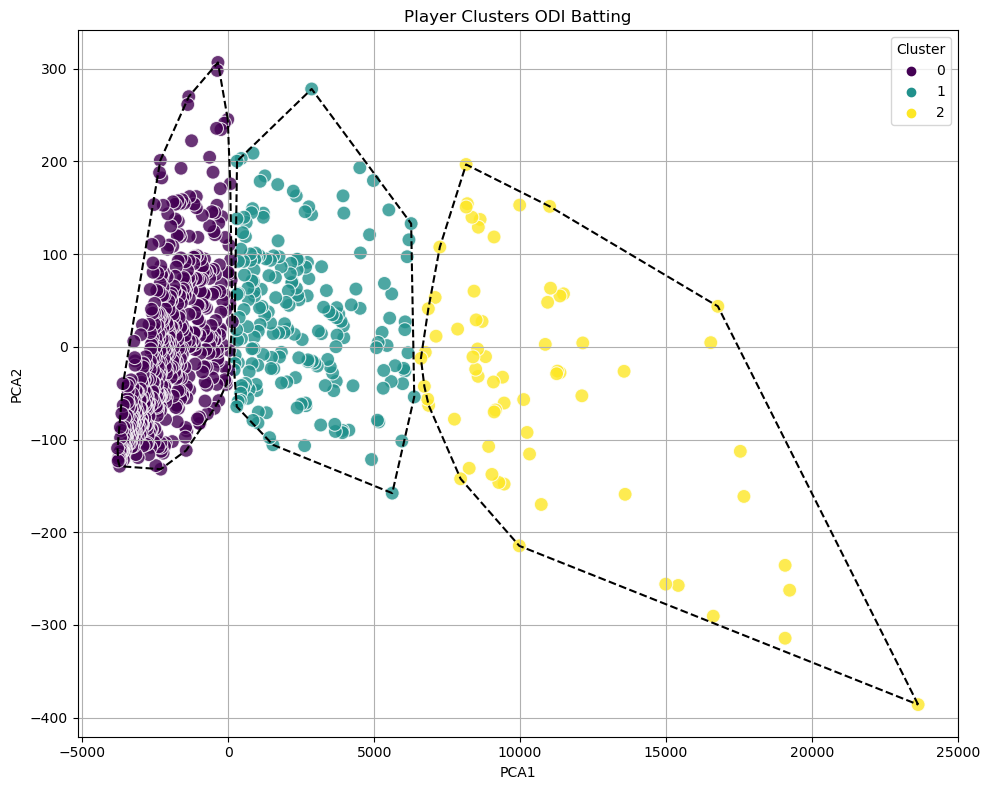

In [104]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters ODI Batting')

# Draw convex hulls for each cluster
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()



In [73]:
sil_score = silhouette_score(data.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score for 3 clusters: {sil_score}")


Silhouette Score for 3 clusters: 0.6462440715598109


Clustering Batting data of test

In [74]:
test_batting=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\test_batting_cleaned.csv')
test_fdata=test_batting[test_batting['Inns']>30]
features=['HS','Runs','Ave','100','50','0']
datatest=test_fdata[features]


In [75]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 1853
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HS      832 non-null    int64  
 1   Runs    832 non-null    float64
 2   Ave     832 non-null    float64
 3   100     832 non-null    float64
 4   50      832 non-null    float64
 5   0       832 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 45.5 KB


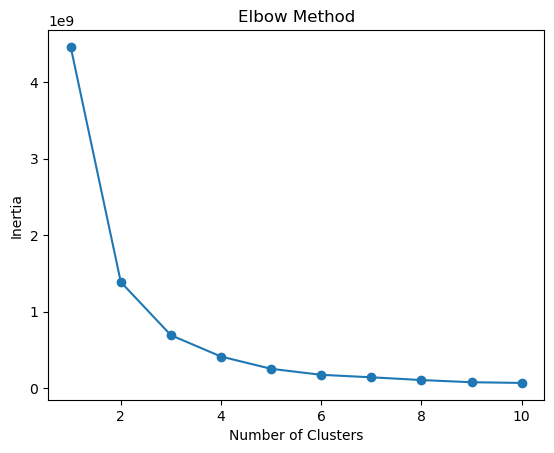

In [76]:
# Determine optimal clusters using the Elbow method
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datatest)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(datatest)
datatest['Cluster'] = clusters

C:\Users\91944\AppData\Local\Temp\ipykernel_15736\2746421428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['Cluster'] = clusters


In [78]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['HS', 'Runs', 'Ave','100', '50', '0'])
print(cluster_centers)


           HS         Runs        Ave        100         50          0
0  102.597884  1054.881834  23.241675   1.289242   4.525573   6.977072
1  188.085859  3669.171717  38.414848   7.929293  18.424242   8.393939
2  263.238806  8424.850746  48.765672  23.522388  38.865672  11.522388


C:\Users\91944\AppData\Local\Temp\ipykernel_15736\1512627348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['PCA1'] = pca_data[:, 0]
C:\Users\91944\AppData\Local\Temp\ipykernel_15736\1512627348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['PCA2'] = pca_data[:, 1]


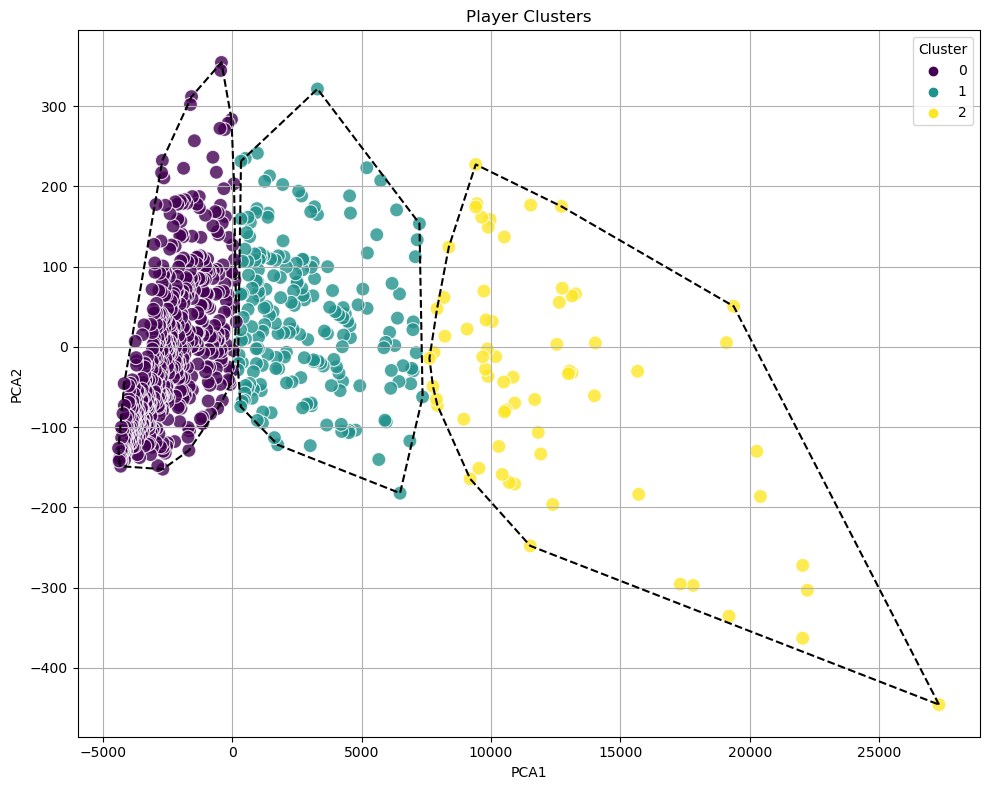

In [101]:
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(datatest)
datatest['PCA1'] = pca_data[:, 0]
datatest['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=datatest, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters')

# Draw convex hulls for each cluster
for cluster_id in sorted(datatest['Cluster'].unique()):
    cluster_data = datatest[datatest['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
sil_score = silhouette_score(datatest.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score for 3 clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.646257434132903


Clustering ODI Bowling Data

In [5]:
odi_bowling=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\odi_bowling_cleaned.csv')

In [6]:
odi_fdata=odi_bowling[odi_bowling['Inns']>30]
features=['Ave','Wkts','Econ','SR','4','5','BBIwick']
odi_fdatabow=odi_fdata[features]

In [83]:
odi_fdatabow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 1146
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ave      467 non-null    float64
 1   Wkts     467 non-null    float64
 2   Econ     467 non-null    float64
 3   SR       467 non-null    float64
 4   4        467 non-null    float64
 5   5        467 non-null    float64
 6   BBIwick  467 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 29.2 KB


In [7]:
odi_bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mat        2582 non-null   int64  
 1   Inns       2582 non-null   float64
 2   Balls      2582 non-null   float64
 3   Runs       2582 non-null   float64
 4   Wkts       2582 non-null   float64
 5   Ave        2582 non-null   float64
 6   Econ       2582 non-null   float64
 7   SR         2582 non-null   float64
 8   4          2582 non-null   float64
 9   5          2582 non-null   float64
 10  Startyear  2582 non-null   int64  
 11  Endyear    2582 non-null   int64  
 12  BBIwick    2582 non-null   int64  
 13  BBIruns    2582 non-null   int64  
 14  Name       2582 non-null   object 
 15  Country    2582 non-null   object 
dtypes: float64(9), int64(5), object(2)
memory usage: 322.9+ KB


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

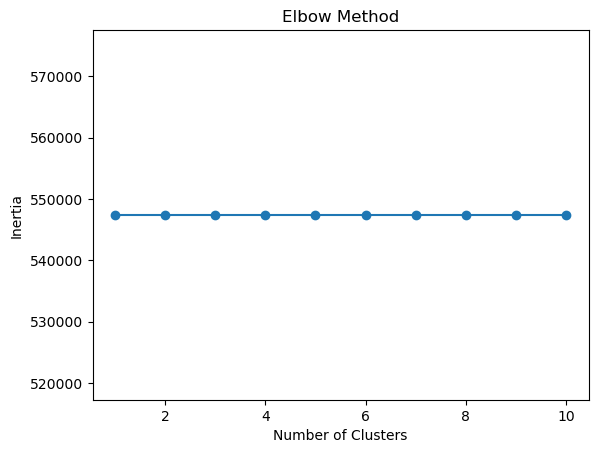

In [84]:
# Determine optimal clusters using the Elbow method
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(odi_fdatabow)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(odi_fdatabow)
odi_fdatabow['Cluster'] = clusters

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\AppData\Local\Temp\ipykernel_15736\2095369922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_fdatabow['Cluster'] = clusters


In [86]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Ave','Wkts','Econ','SR','4','5','BBIwick'])
print(cluster_centers)

         Ave        Wkts      Econ         SR         4         5   BBIwick
0  36.651929   53.282958  4.825723  45.577814  1.173633  0.379421  4.028939
1  30.780720  138.952000  4.696560  39.596000  3.704000  1.424000  5.016000
2  27.746452  315.064516  4.479032  37.200000  8.903226  3.967742  5.709677


C:\Users\91944\AppData\Local\Temp\ipykernel_15736\147875197.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_fdatabow['PCA1'] = pca_data[:, 0]
C:\Users\91944\AppData\Local\Temp\ipykernel_15736\147875197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_fdatabow['PCA2'] = pca_data[:, 1]


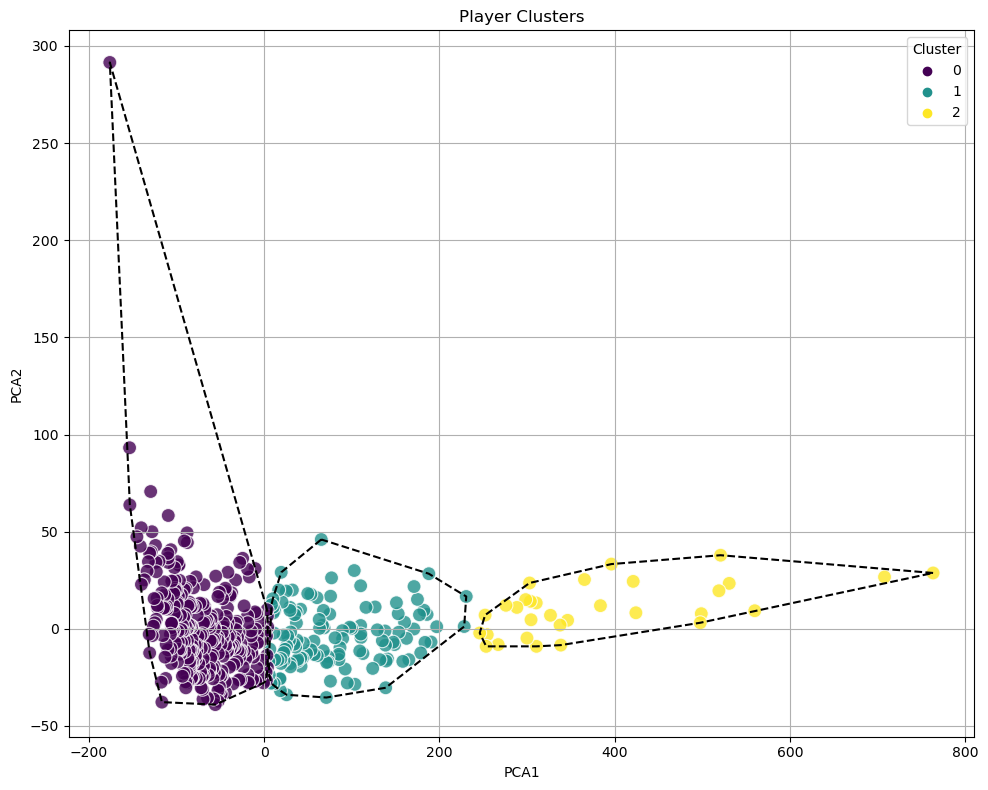

In [97]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(odi_fdatabow)
odi_fdatabow['PCA1'] = pca_data[:, 0]
odi_fdatabow['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=odi_fdatabow, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters')

# Draw convex hulls for each cluster
for cluster_id in sorted(odi_fdatabow['Cluster'].unique()):
    cluster_data = odi_fdatabow[odi_fdatabow['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
sil_score = silhouette_score(odi_fdatabow.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score for 3 clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.5734758404788936


Clustering T20 Bowling data

In [89]:
t20_bowling=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\t20_bowling_cleaned.csv')
t20_fdata=t20_bowling[t20_bowling['Inns']>10]
features=['Ave','Wkts','Econ','SR','4','5','BBIwick']
t20_fdatabow=t20_fdata[features]

In [90]:
t20_fdatabow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 706
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ave      337 non-null    float64
 1   Wkts     337 non-null    float64
 2   Econ     337 non-null    float64
 3   SR       337 non-null    float64
 4   4        337 non-null    float64
 5   5        337 non-null    float64
 6   BBIwick  337 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 21.1 KB


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

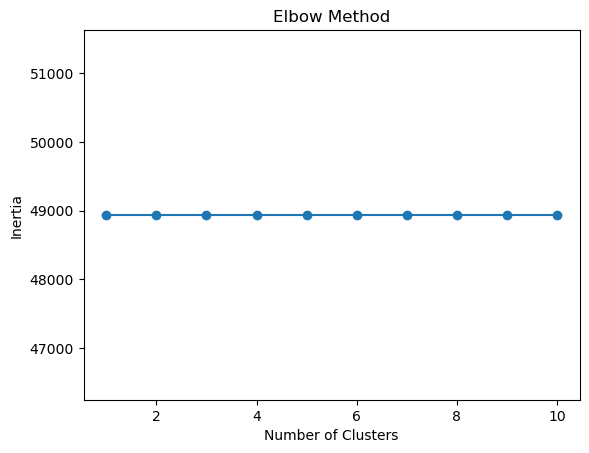

In [91]:
# Determine optimal clusters using the Elbow method
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(t20_fdatabow)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [92]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(t20_fdatabow)
t20_fdatabow['Cluster'] = clusters

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91944\AppData\Local\Temp\ipykernel_15736\937740196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20_fdatabow['Cluster'] = clusters


In [93]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Ave','Wkts','Econ','SR','4','5','BBIwick'])
print(cluster_centers)

         Ave       Wkts      Econ         SR         4             5   BBIwick
0  21.786882  23.655914  7.394194  17.645699  0.408602  9.139785e-02  3.440860
1  36.771500  10.760000  7.862200  28.133000  0.070000  6.938894e-17  2.360000
2  21.761961  56.941176  7.225882  17.986275  1.392157  3.725490e-01  4.176471


C:\Users\91944\AppData\Local\Temp\ipykernel_15736\2876388267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20_fdatabow['PCA1'] = pca_data[:, 0]
C:\Users\91944\AppData\Local\Temp\ipykernel_15736\2876388267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t20_fdatabow['PCA2'] = pca_data[:, 1]


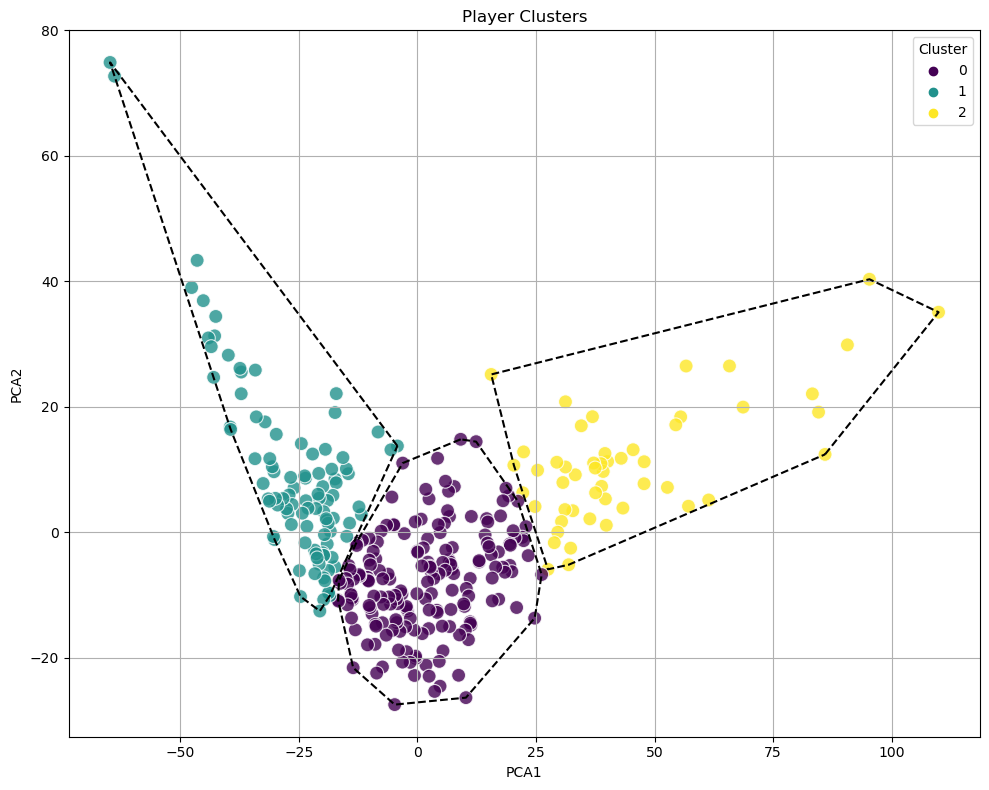

In [103]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(t20_fdatabow)
t20_fdatabow['PCA1'] = pca_data[:, 0]
t20_fdatabow['PCA2'] = pca_data[:, 1]

# Plot clusters with convex hulls
plt.figure(figsize=(10, 8))
sns.scatterplot(data=t20_fdatabow, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Player Clusters')

# Draw convex hulls for each cluster
for cluster_id in sorted(t20_fdatabow['Cluster'].unique()):
    cluster_data = t20_fdatabow[t20_fdatabow['Cluster'] == cluster_id][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the hull
        plt.plot(cluster_data[hull_points, 0], cluster_data[hull_points, 1], linestyle='--', color='black')

# Final adjustments
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
sil_score = silhouette_score(t20_fdatabow.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score for 3 clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.4162763482793136
